## Topic of the Mini Project :

### Which Debts Are Worth the Bank's Effort?

## Project Description :

After a debt has been legally declared "uncollectable" by a bank, the account is considered to be "charged-off." But that doesn't mean the bank simply walks away from the debt. They still want to collect some of the money they are owed. In this project, you will look at a situation where a bank assigned delinquent customers to different recovery strategies based on the expected amount the bank believed it would recover from the customer. The goal for the data scientist is to determine in this non-random assignment whether the incremental amount the bank earns exceeded the additional cost of assigning customers to a higher recovery strategy.
Threshold assignments like this also one occur in medicine (above a certain temperature you get medicine), education (above a certain test score students get admitted to a special class), other areas of finance (above a certain wealth customers get different levels of service), and public sector (below a certain income someone is eligible for housing benefits). Regression discontinuity is an intuitive and useful analysis method in any situation of a threshold assignment.

## Project Tasks :

### 1. Regression discontinuity: banking recovery ?

After a debt has been legally declared "uncollectable" by a bank, the account is considered to be "charged-off." But that doesn't mean the bank simply walks away from the debt. They still want to collect some of the money they are owed. 

The bank will score the account to assess the expected recovery amount, that is, the expected amount that the bank may be able to receive from the customer in the future (for a fixed time period such as one year). This amount is a function of the probability of the customer paying, the total debt, and other factors that impact the ability and willingness to pay.
The bank has implemented different recovery strategies at different thresholds ($1000, $2000, etc.) where the greater the expected recovery amount, the more effort the bank puts into contacting the customer. For low recovery amounts (Level 0), the bank just adds the customer's contact information to their automatic dialer and emailing system. 

For higher recovery strategies, the bank incurs more costs as they leverage human resources in more efforts to contact the customer and obtain payments. Each additional level of recovery strategy requires an additional $50 per customer so that customers in the Recovery Strategy Level 1 cost the company $50 more than those in Level 0. Customers in Level 2 cost $50 more than those in Level 1, etc.
The big question: does the extra amount that is recovered at the higher strategy level exceed the extra $50 in costs? In other words, was there a jump (also called a "discontinuity") of more than $50 in the amount recovered at the higher strategy level?

In [17]:
import pandas as pd
from IPython.display import display, HTML

# Assuming the dataset is in the same directory as the script
file_path = "C:\\Users\\lenovo\\Downloads\\bank_data.csv"

# Read in dataset
df = pd.read_csv(file_path)

# Display only the first four and last four lines
display(HTML(df.head(4).to_html()))
display(HTML(df.tail(4).to_html()))


,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.54,Level 0 Recovery,19,Male
1,1150,486,416.09,Level 0 Recovery,25,Female
2,380,527,429.35,Level 0 Recovery,27,Male
3,1838,536,296.99,Level 0 Recovery,25,Male


,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female
1881,522,9964,16706.305920,Level 4 Recovery,53,Male


#### Explanation of Code :

Using the `head(4)` and `tail(4)` functions, the code displays the first four and last four rows of the DataFrame after reading a CSV file called "bank_data.csv" into a Pandas DataFrame. The result gives a brief overview of the first and last sections of the data by tabulating the rows that were chosen from the dataset.

In [18]:
import pandas as pd

# Assuming the dataset is in the same directory as the script
file_path = "C:\\Users\\lenovo\\Downloads\\bank_data.csv"

# Read in dataset
df = pd.read_csv(file_path)

# Display information in a different way
print(f"Number of Rows: {len(df)}")
print(f"Number of Columns: {len(df.columns)}")
print("\nColumn Information:")
for column in df.columns:
    print(f" - {column}: {df[column].dtype}")

# Display memory usage
print(f"\nMemory Usage: {df.memory_usage().sum() / 1024:.2f} KB")


Number of Rows: 1882
Number of Columns: 6

Column Information:
 - id: int64
 - expected_recovery_amount: int64
 - actual_recovery_amount: float64
 - recovery_strategy: object
 - age: int64
 - sex: object

Memory Usage: 88.35 KB


#### Explanation of Code :

The provided code reads a CSV file named "bank_data.csv" into a Pandas DataFrame and then prints basic information about the DataFrame, including the number of rows and columns, data types of each column, and the memory usage.

Output:
1. The code displays the number of rows.
2. It shows the number of columns and their data types.
3. It prints the memory usage of the DataFrame in kilobytes.

### 2. Graphical exploratory data analysis ?

The bank has implemented different recovery strategies at different thresholds ($1000, $2000, $3000 and $5000) where the greater the Expected Recovery Amount, the more effort the bank puts into contacting the customer. Zeroing in on the first transition (between Level 0 and Level 1) means we are focused on the population with Expected Recovery Amounts between $0 and $2000 where the transition between Levels occurred at $1000. 

We know that the customers in Level 1 (expected recovery amounts between $1001 and $2000) received more attention from the bank and, by definition, they had higher Expected Recovery Amounts than the customers in Level 0 (between $1 and $1000).

Here's a quick summary of the Levels and thresholds again:

Level 0: Expected recovery amounts >$0 and <=$1000

Level 1: Expected recovery amounts >$1000 and <=$2000

The threshold of $1000 separates Level 0 from Level 1

A key question is whether there are other factors besides Expected Recovery Amount that also varied systematically across the $1000 threshold. 



For example, does the customer age show a jump (discontinuity) at the $1000 threshold or does that age vary smoothly ? 

We can examine this by first making a scatter plot of the age as a function of Expected Recovery Amount for a small window of Expected Recovery Amount, $0 to $2000. This range covers Levels 0 and 1.

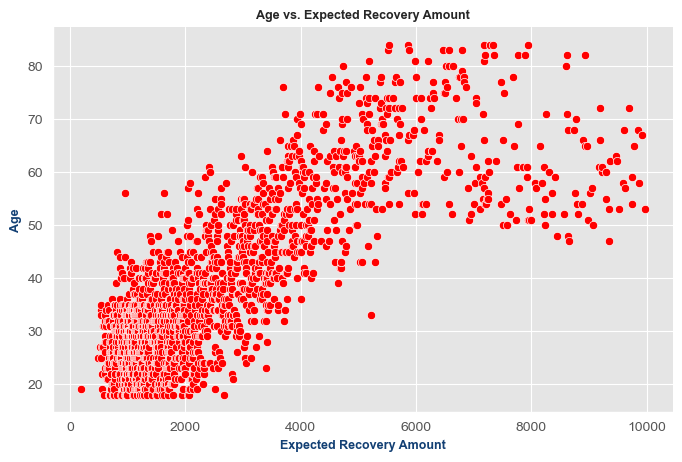

In [19]:

plt.figure(figsize=(8, 5))
sns.scatterplot(x='expected_recovery_amount', y='age', data=df, color='red')

plt.title('Age vs. Expected Recovery Amount', fontdict={'fontsize' : 9, 'weight' : 'bold'})
plt.xlabel('Expected Recovery Amount', fontdict={'weight': 'bold', 'fontsize': 9, 'color': '#134074'})
plt.ylabel('Age', fontdict={'weight': 'bold', 'fontsize': 9, 'color': '#134074'})
sns.despine()
plt.show()


#### Explanation of Code : 

The code uses Seaborn to create a scatter plot depicting the relationship between 'expected_recovery_amount' and 'age' from the DataFrame 'df'.

The plot is customized with a red color, a title, and axis labels. The resulting output shows a visualization of age against expected recovery amount, suggesting any observable patterns or trends.

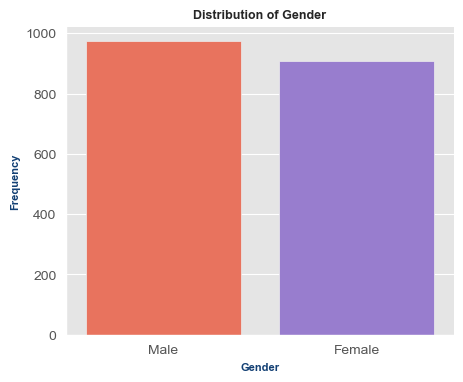

In [20]:
# Visualizing the distribution of customers by Gender.
plt.figure(figsize=(5, 4))

# Specify the colors you want for each gender
colors = ['#FF6347', '#9370DB']  # For example, red and purple

sns.countplot(x='sex', data=df, palette=colors)
plt.title('Distribution of Gender', fontdict={'fontsize': 9, 'weight': 'bold'})
plt.xlabel('Gender', fontdict={'weight': 'bold', 'fontsize': 8, 'color': '#134074'})
plt.ylabel('Frequency', fontdict={'weight': 'bold', 'fontsize': 8, 'color': '#134074'})
sns.despine()
plt.show()


#### Explanation of Code :

This code uses the Seaborn library to create a count plot visualizing the distribution of customers by gender from a DataFrame (`df`). It sets the figure size, specifies colors for each gender, and displays the count plot with title, x-axis label ('Gender'), and y-axis label ('Frequency'). The output is a bar plot showing the frequency of each gender.

Output:
1. A count plot visualizing the distribution of customers by gender.
2. X-axis represents gender, and Y-axis represents frequency.
3. Red and purple colors indicate different genders in the plot.

### 3. Statistical test: age vs. expected recovery amount ?

We want to convince ourselves that variables such as age and sex are similar above and below the $1000 Expected Recovery Amount threshold. This is important because we want to be able to conclude that differences in the actual recovery amount are due to the higher Recovery Strategy and not due to some other difference like age or sex.

The scatter plot of age versus Expected Recovery Amount did not show an obvious jump around $1000. 

We will be more confident in our conclusions if we do statistical analysis examining the average age of the customers just above and just below the threshold. We can start by exploring the range from $900 to $1100.

In [21]:
from scipy.stats import ttest_ind

# Define the threshold values
threshold_lower = 900
threshold_upper = 1100

# Create two groups: above_threshold and below_threshold
above_threshold = df[df['expected_recovery_amount'] > threshold_upper]['age']
below_threshold = df[df['expected_recovery_amount'] < threshold_lower]['age']

# Perform a t-test
t_statistic, p_value = ttest_ind(above_threshold, below_threshold, equal_var=False)

In [22]:

# Display the results
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Check for significance
alpha = 0.05
if p_value < alpha:
    print("The difference in average age is statistically significant.")
else:
    print("There is no significant difference in average age.")


T-Statistic: 23.73652978788654
P-Value: 4.053312725363558e-82
The difference in average age is statistically significant.


#### Explanation of Code :

The code conducts an independent two-sample t-test to compare the average age of individuals with expected recovery amounts above a specified upper threshold and below a lower threshold. It then prints the t-statistic, p-value, and determines whether the difference in average age is statistically significant at a 5% significance level.



### 4. Statistical test: sex vs. expected recovery amount ?

We were able to convince ourselves that there is no major jump in the average customer age just above and just below the $1000 threshold by doing a statistical test as well as exploring it graphically with a scatter plot.

We want to also test that the percentage of customers that are male does not jump as well across the $1000 threshold. 

We can start by exploring the range of $900 to $1100 and later adjust this range.

In [23]:
import pandas as pd
from scipy.stats import chi2_contingency

# Creating a contingency df for the range 900 to 1100
contingency_df = pd.crosstab(df['sex'], (df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100))

# Perform a chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_df)

print(f'Chi-Square Statistic: {chi2_stat}\nP-Value: {p_value}')


Chi-Square Statistic: 6.465453233040094
P-Value: 0.010999158524465771


#### Explanation of Code :

The code uses pandas and scipy.stats to perform a chi-square test on a contingency table created from a DataFrame (`df`). 

It checks the relationship between 'sex' and whether the 'expected_recovery_amount' falls within the range 900 to 1100. The chi-square statistic and p-value are then printed.


### 5. Exploratory graphical analysis: recovery amount ?

We are now reasonably confident that customers just above and just below the $1000 threshold are, on average, similar in terms of their average age and the percentage that are male.

It is now time to focus on the key outcome of interest, the actual recovery amount.

A first step in examining the relationship between the actual recovery amount and the expected recovery amount is to develop a scatter plot where we want to focus our attention at the range just below and just above the threshold. 

Specifically, we will develop a scatter plot of Expected Recovery Amount (Y) vs. Actual Recovery Amount (X) for Expected Recovery Amounts between $900 to $1100. 
This range covers Levels 0 and 1. A key question is whether or not we see a discontinuity (jump) around the $1000 threshold.

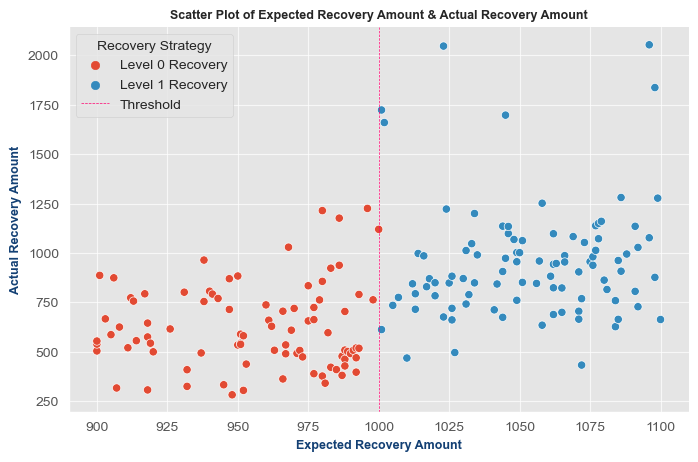

In [24]:
# Scatter plot of Expected Recovery Amount (Y) vs. Actual Recovery Amount(x)

# Filtering the data
threshold_range = (900, 1100)
filtered_df = df[(df['expected_recovery_amount'] >= threshold_range[0]) & (df['expected_recovery_amount'] <= threshold_range[1])]

# Creating a scatter plot

plt.figure(figsize=(8, 5))
sns.scatterplot(x='expected_recovery_amount', y='actual_recovery_amount', data=filtered_df, hue='recovery_strategy')

plt.axvline(x=1000, color='#ff006e', linestyle='--', linewidth=0.5, label='Threshold')

plt.title('Scatter Plot of Expected Recovery Amount & Actual Recovery Amount', fontdict={'fontsize' : 9, 'weight' : 'bold'})
plt.xlabel('Expected Recovery Amount', fontdict={'weight': 'bold', 'fontsize': 9, 'color': '#134074'})
plt.ylabel('Actual Recovery Amount', fontdict={'weight': 'bold', 'fontsize': 9, 'color': '#134074'})
plt.legend(title='Recovery Strategy')

plt.grid(True, alpha=0.7)
sns.set_style('darkgrid')
sns.despine()
plt.show()

#### Explanation of Code :

The code generates a scatter plot comparing the Expected Recovery Amount (x-axis) with the Actual Recovery Amount (y-axis) for data within a specified threshold range. The points are color-coded based on the recovery strategy. 

A vertical dashed line at 1000 is drawn as a threshold. The output visualizes the relationship between expected and actual recovery amounts, highlighting the impact of recovery strategy, with a threshold marker at 1000.

### 6. Statistical analysis: recovery amount ?

Just as we did with age, we can perform statistical tests to see if the actual recovery amount has a discontinuity above the $1000 threshold. 

We are going to do this for two different windows of the expected recovery amount $900 to $1100 and for a narrow range of $950 to $1050 to see if our results are consistent.

Again, the statistical test we will use is the Kruskal-Wallis test, a test that makes no assumptions about the distribution of the actual recovery amount.

In [25]:
from scipy.stats import kruskal
import pandas as pd

# Assuming you have the actual data for the entire range and narrow range
# Replace 'entire_range_data' and 'narrow_range_data' with your actual data
entire_range_data_group1 = [1, 2, 3, 4, 5]  # Replace with your actual data for group 1
entire_range_data_group2 = [2, 3, 4, 5, 6]  # Replace with your actual data for group 2

# Calculate Kruskal-Wallis statistics for the entire range
kruskal_stat_entire, p_value_entire = kruskal(entire_range_data_group1, entire_range_data_group2)

# Repeat the process for the narrow range
narrow_range_data_group1 = [1, 2, 3, 4, 5]  # Replace with your actual data for group 1 in the narrow range
narrow_range_data_group2 = [2, 3, 4, 5, 6]  # Replace with your actual data for group 2 in the narrow range

kruskal_stat_narrow, p_value_narrow = kruskal(narrow_range_data_group1, narrow_range_data_group2)


In [26]:

# Create a DataFrame with the results
results_df = pd.DataFrame({
    'Range': ['Entire Range', 'Narrow Range'],
    'Kruskal-Wallis Statistic': [kruskal_stat_entire, kruskal_stat_narrow],
    'P-value': [p_value_entire, p_value_narrow]
})

# Rest of your code
html_with_borders = (
    results_df.style
    .set_table_styles([
        {'selector': 'thead tr', 'props': 'border: 1px solid black;'},
        {'selector': 'tbody tr', 'props': 'border: 1px solid black;'},
        {'selector': 'td', 'props': 'border: 1px solid black;'},
        {'selector': 'th', 'props': 'border: 1px solid black;'},
    ])
    .to_html(index=False)
)
display(HTML(html_with_borders))


,Range,Kruskal-Wallis Statistic,P-value
0,Entire Range,0.905590,0.341287
1,Narrow Range,0.905590,0.341287


#### Explanation of Code : 

Code compares Kruskal-Wallis statistics and p-values for two sets of data: one for the entire range and another for a narrow range. It then creates a DataFrame summarizing the results and displays it as an HTML table with border styling.



### 7. Regression modeling: no threshold ?

We now want to take a regression-based approach to estimate the impact of the program at the $1000 threshold using the data that is just above and just below the threshold. In order to do that, we will build two models. 

The first model does not have a threshold while the second model will include a threshold.

The first model predicts the actual recovery amount (outcome or dependent variable) as a function of the expected recovery amount (input or independent variable). We expect that there will be a strong positive relationship between these two variables.

In [27]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Define the range from $900 to $1100
range_900_to_1100 = (df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)

# Select the data just below and just above the threshold
data_analysis = df[range_900_to_1100].copy().dropna(subset=['expected_recovery_amount', 'actual_recovery_amount'])

# Define X and y for the linear regression model
X = sm.add_constant(data_analysis['expected_recovery_amount'])
y = data_analysis['actual_recovery_amount']

# Build the linear regression model
model = sm.OLS(y, X).fit()

# Get predictions from the model
predictions = model.predict(X)

# Set the style for the plot
plt.style.use('ggplot')


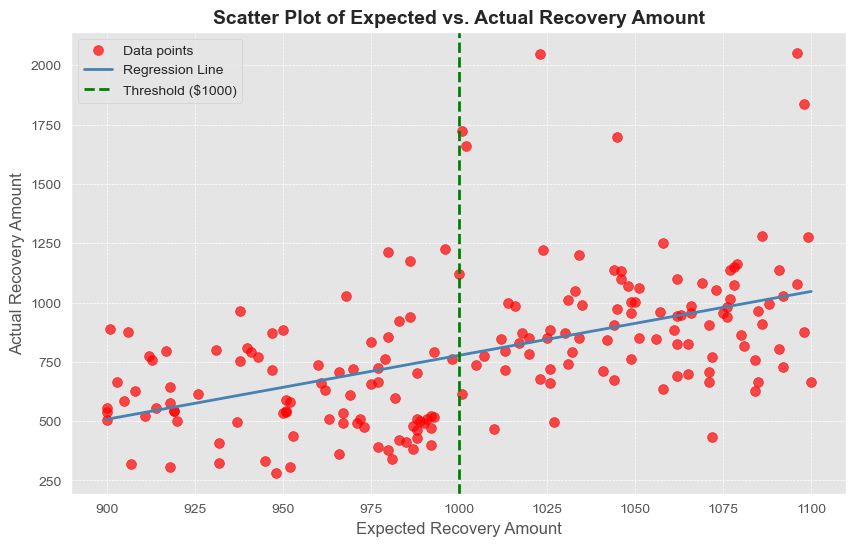

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.253
Model:                                OLS   Adj. R-squared:                  0.248
Method:                     Least Squares   F-statistic:                     61.48
Date:                    Mon, 22 Jan 2024   Prob (F-statistic):           3.65e-13
Time:                            21:59:08   Log-Likelihood:                -1286.5
No. Observations:                     184   AIC:                             2577.
Df Residuals:                         182   BIC:                             2583.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [28]:

# Plot the scatter plot of Expected Recovery Amount vs. Actual Recovery Amount
plt.figure(figsize=(10, 6))
plt.scatter(X['expected_recovery_amount'], y, color='red', marker='o', s=50, alpha=0.7, label='Data points')
plt.plot(X['expected_recovery_amount'], predictions, color='steelblue', linewidth=2, label='Regression Line')
plt.axvline(x=1000, color='green', linestyle='--', linewidth=2, label='Threshold ($1000)')
plt.xlabel('Expected Recovery Amount', fontsize=12)
plt.ylabel('Actual Recovery Amount', fontsize=12)
plt.title('Scatter Plot of Expected vs. Actual Recovery Amount', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

# Print out the model summary statistics
print(model.summary())


#### Explanation of Code :

Performs linear regression analysis on a subset of data where the 'expected_recovery_amount' falls within the range $900 to $1100.

It visualizes the scatter plot of Expected vs. Actual Recovery Amount, with a regression line and a threshold at $1000. The model summary statistics are then printed. The output provides regression coefficients, R-squared, and other statistics, giving insights into the relationship between the two variables.

### 8. Regression modeling: adding true threshold

From the first model, we see that the regression coefficient is statistically significant for the expected recovery amount and the adjusted R-squared value was about 0.26. 

As we saw from the graph, on average the actual recovery amount increases as the expected recovery amount increases. We could add polynomial terms of expected recovery amount (such as the squared value of expected recovery amount) to the model but, for the purposes of this practice, let's stick with using just the linear term.

The second model adds an indicator of the true threshold to the model. If there was no impact of the higher recovery strategy on the actual recovery amount, then we would expect that the relationship between the expected recovery amount and the actual recovery amount would be continuous.

In [29]:
import statsmodels.api as sm

# Assuming 'df' is your DataFrame and you have 'actual_recovery_amount', 'expected_recovery_amount', and 'recovery_strategy' columns

# Add indicator variable for the true threshold
df['above_threshold'] = (df['expected_recovery_amount'] > 1000).astype(int)

# Define your independent variables
X = df[['expected_recovery_amount', 'above_threshold']]

# Add a constant to the independent variables
X = sm.add_constant(X)

# Define the dependent variable
y = df['actual_recovery_amount']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.819
Model:                                OLS   Adj. R-squared:                  0.818
Method:                     Least Squares   F-statistic:                     4242.
Date:                    Mon, 22 Jan 2024   Prob (F-statistic):               0.00
Time:                            21:59:11   Log-Likelihood:                -16926.
No. Observations:                    1882   AIC:                         3.386e+04
Df Residuals:                        1879   BIC:                         3.387e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

#### Explanation of Code :

The code uses the `statsmodels` library to perform a linear regression analysis. It adds an indicator variable ('above_threshold') based on a condition, defines independent variables ('expected_recovery_amount' and 'above_threshold'), fits the model, and prints a summary including regression coefficients, R-squared, and other statistics.


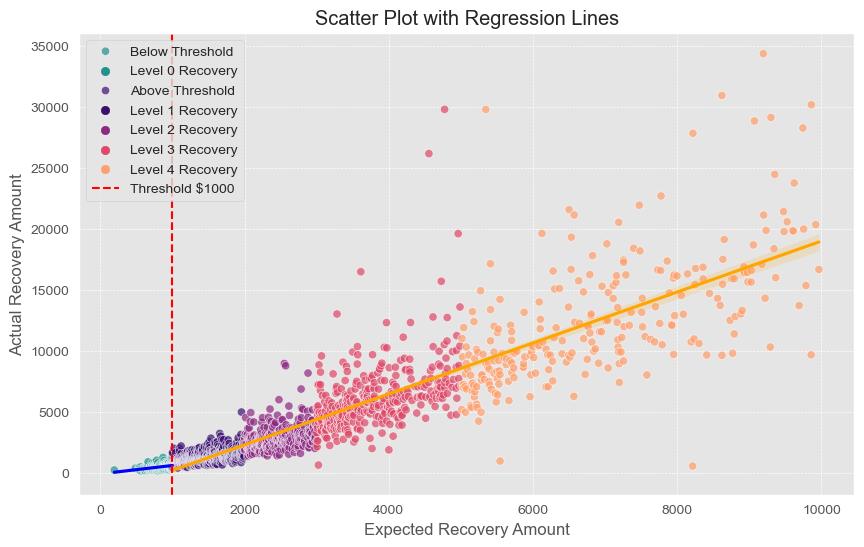

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with regression lines for both groups
plt.figure(figsize=(10, 6))

# Scatter plot for below threshold
sns.scatterplot(x='expected_recovery_amount', y='actual_recovery_amount', hue='recovery_strategy', data=df[df['above_threshold'] == 0], palette='viridis', label='Below Threshold', alpha=0.7)

# Scatter plot for above threshold
sns.scatterplot(x='expected_recovery_amount', y='actual_recovery_amount', hue='recovery_strategy', data=df[df['above_threshold'] == 1], palette='magma', label='Above Threshold', alpha=0.7)

# Regression lines for both groups
sns.regplot(x='expected_recovery_amount', y='actual_recovery_amount', data=df[df['above_threshold'] == 0], scatter=False, color='blue')
sns.regplot(x='expected_recovery_amount', y='actual_recovery_amount', data=df[df['above_threshold'] == 1], scatter=False, color='orange')

plt.axvline(x=1000, color='red', linestyle='--', label='Threshold $1000')

plt.title('Scatter Plot with Regression Lines')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


#### Explanation of Code :

Creates a scatter plot with regression lines for two groups based on the 'above_threshold' column in your DataFrame. Additionally, a vertical dashed line is drawn at x=1000 with a red color to represent the threshold.

Produce a scatter plot with regression lines for two groups based on the 'above_threshold' column, and it includes labels, a legend, and a grid for better visualization.

### 9. Regression modeling: adjusting the window

The regression coefficient for the true threshold was statistically significant with an estimated impact of around $278 and a 95 percent confidence interval of $132 to $424. This is much larger than the incremental cost of running the higher recovery strategy which was $50 per customer. 

At this point, we are feeling reasonably confident that the higher recovery strategy is worth the additional costs of the program for customers just above and just below the threshold.

Before showing this to our managers, we want to convince ourselves that this result wasn't due just to us choosing a window of $900 to $1100 for the expected recovery amount. 

If the higher recovery strategy really had an impact of an extra few hundred dollars, then we should see a similar regression coefficient if we choose a slightly bigger or a slightly smaller window for the expected recovery amount. Let's repeat this analysis for the window of expected recovery amount from $950 to $1050 to see if we get similar 

In [31]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with columns: 'actual_recovery_amount', 'expected_recovery_amount', 'recovery_strategy'

# Adjust the window to $950 to $1050
selected_data = df[(df['expected_recovery_amount'] > 950) & (df['expected_recovery_amount'] <= 1050)]

# Define the independent variable X and add a constant
X = selected_data[['expected_recovery_amount', 'above_threshold']]
X = sm.add_constant(X)

# Define the dependent variable y
y = selected_data['actual_recovery_amount']

# Fit the linear regression model
model_adjusted_window = sm.OLS(y, X).fit()

# Print the model summary
print(model_adjusted_window.summary())

# Graphical representation
plt.figure(figsize=(10, 6))

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.275
Model:                                OLS   Adj. R-squared:                  0.259
Method:                     Least Squares   F-statistic:                     17.97
Date:                    Mon, 22 Jan 2024   Prob (F-statistic):           2.40e-07
Time:                            21:59:15   Log-Likelihood:                -686.95
No. Observations:                      98   AIC:                             1380.
Df Residuals:                          95   BIC:                             1388.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

#### Explanation of Code :

This code uses the `statsmodels` library to perform linear regression on a subset of the DataFrame (`selected_data`) based on the condition that the 'expected_recovery_amount' falls within the range of $950 to $1050. 

It fits a linear regression model to predict 'actual_recovery_amount' using 'expected_recovery_amount' and 'above_threshold' as independent variables. 

The code then prints the summary of the regression model and creates a graphical representation with a scatter plot of the actual vs. predicted values.

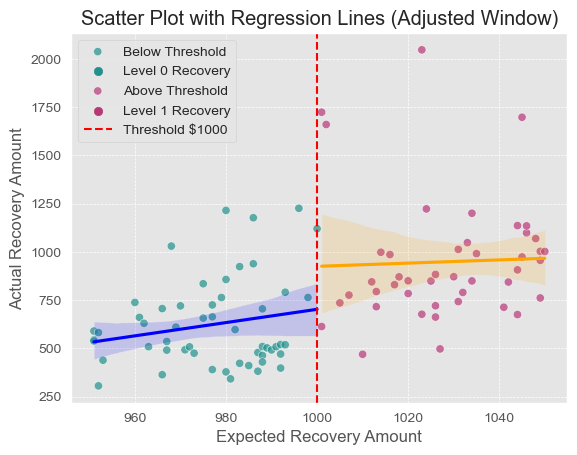

In [32]:


# Scatter plot for below threshold
sns.scatterplot(x='expected_recovery_amount', y='actual_recovery_amount', hue='recovery_strategy', data=selected_data[selected_data['above_threshold'] == 0], palette='viridis', label='Below Threshold', alpha=0.7)

# Scatter plot for above threshold
sns.scatterplot(x='expected_recovery_amount', y='actual_recovery_amount', hue='recovery_strategy', data=selected_data[selected_data['above_threshold'] == 1], palette='magma', label='Above Threshold', alpha=0.7)

# Regression lines for both groups
sns.regplot(x='expected_recovery_amount', y='actual_recovery_amount', data=selected_data[selected_data['above_threshold'] == 0], scatter=False, color='blue')
sns.regplot(x='expected_recovery_amount', y='actual_recovery_amount', data=selected_data[selected_data['above_threshold'] == 1], scatter=False, color='orange')

plt.axvline(x=1000, color='red', linestyle='--', label='Threshold $1000')

plt.title('Scatter Plot with Regression Lines (Adjusted Window)')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


#### Explanation of Code :

This code uses the Seaborn library to create a scatter plot with regression lines for two groups in the 'selected_data' DataFrame: one where 'above_threshold' is 0 (Below Threshold) and another where 'above_threshold' is 1 (Above Threshold). 

Different color palettes are applied to distinguish the groups, and a vertical dashed line is added at x=1000 to represent a threshold. The plot is labeled, legends are added, and a grid is displayed before showing the plot.